## Загрузка необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
plt.style.use('ggplot')

## Загрузка датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i (1).csv')

#### Посмотрим 5 первых и последних строк набора данных

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### Уже на данном этапе видно, что в исследуемых данных присутствуют строковые, целочисленные столбцы
#### Из описания датасета: Среди всех отраслей страховая сфера наиболее широко использует методы аналитики и анализа данных. Этот набор состоит из данных страховых компаний, из данных можно понять, с какими проблемами они  сталкиваются, какие стратегии используются, какие переменные влияют на результат и т. Д. Это проблема классификации. Данные имеют 615 строк и 13 столбцов.
#### Компания хочет автоматизировать процесс определения права на получение кредита (в режиме реального времени) на основе сведений о клиенте, предоставленных при заполнении онлайн-формы заявки. Эти данные включают пол, семейное положение, образование, количество иждивенцев, доход, размер ссуды, кредитную историю и другие. Чтобы автоматизировать этот процесс, они поставили задачу определить сегменты клиентов, которые имеют право на получение ссуды, чтобы они могли конкретно ориентироваться на этих клиентов. Здесь они предоставили частичный набор данных.
#### Задачей данной работы является проведение описательного анализа и визуализации данных, выявление каких-либо закономерностей и формирование выводов

## Описательный анализ
#### Узнаем размер датасета

In [ ]:
df.shape

(614, 13)

#### Итак, в датасете имеется 614 строк и 13 столбцов(признаков, атрибутов)
#### Посмотрим, данные каких типов есть в датасете

In [ ]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,Loan_ID,object
1,Gender,object
2,Married,object
3,Dependents,object
4,Education,object
5,Self_Employed,object
6,ApplicantIncome,int64
7,CoapplicantIncome,float64
8,LoanAmount,float64
9,Loan_Amount_Term,float64


In [ ]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,4
2,object,8


#### Как и предполагалось ранее, в датасете есть строковые, вещественные и целочисленные данные
#### Теперь узнаем, есть ли пропущенные значения

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Видно, что столбцы Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History имеют пустые строки, их процентное значение невелико, можно удалить данные строки, а можно попробовать заменить их на самые частотные значения. Попробуем осуществить последний вариант для тех столбцов, где количество пропущенных значений больше 20, в остальных столбцах удалим пустые строки, также удалим столбец loan_ID:

In [ ]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [ ]:
df['Self_Employed'].value_counts().sort_values()

Yes     82
No     500
Name: Self_Employed, dtype: int64

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Self_Employed'].isnull().sum()

0

In [ ]:
df['LoanAmount'].value_counts().sort_values()

311.0     1
320.0     1
35.0      1
153.0     1
207.0     1
         ..
160.0    12
187.0    12
100.0    15
110.0    17
120.0    20
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
# Здесь заменим средним, т.к. слишком мало самого частотного варианта:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount'].isnull().sum()

0

In [ ]:
df['Credit_History'].value_counts().sort_values()

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)
df['Credit_History'].isnull().sum()

0

In [ ]:
df=df.dropna(axis=0)

#### Узнаем, сколько уникальных значений содержит каждый столбец

In [ ]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      469
CoapplicantIncome    274
LoanAmount           200
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### С помощью функции describe выведем и рассмотрим описательные статистики для информативных атрибутов нашего датасета

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,573.000000,573.000000,573.000000,573.000000,573.000000
mean,5328.514834,1641.359372,146.016131,341.675393,0.869110
std,5909.329219,3001.139055,82.569554,65.186012,0.337575
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5815.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


#### Максимальный доход заявителя - 81000, минимальный - 150, средний - 5328. 75% квартиль намного меньше максимального значения, следовательно, существуют выбросы. Такая же ситуация с CoapplicantIncome.

#### Теперь рассмотрим описательные статистики для столбцов строкового типа

In [ ]:
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,573,573,573,573,573,573,573
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,467,372,327,450,498,219,398


#### Здесь можно увидеть, например, что среди заявителей большее число составляют мужчины, их 467.
#### Большая часть женаты/замужем, имеют образование


### Построим распределение некоторых признаков

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



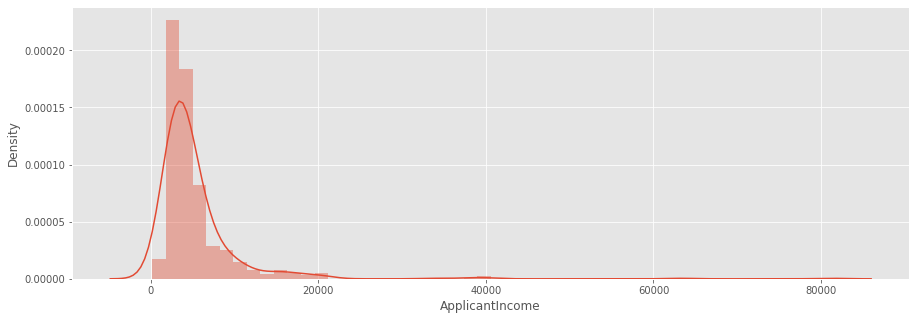

In [ ]:
#распределение дохода
plt.figure(figsize=(15,5))
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



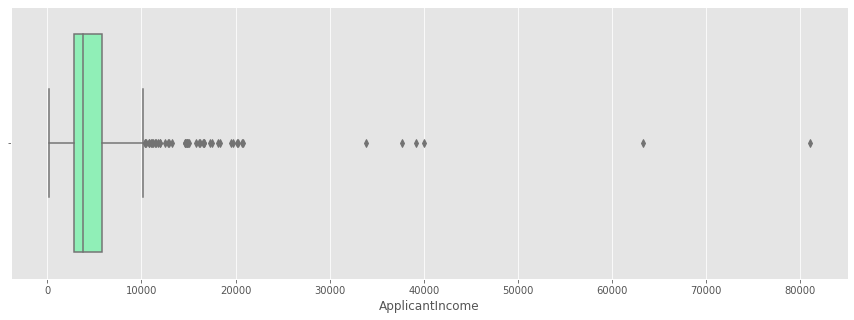

In [ ]:
#Проверим, есть ли выбросы
plt.figure(figsize=(15,5))
sns.boxplot(df['ApplicantIncome'], palette='rainbow')

#### Видим, что имеются выбросы, это можно оценить и как нормальную ситуацию(например, доход некоторых людей очень высок, по сравнению со среднестатистическим), а возможно это и некорректные значения. Т.к. основная задача варианта не в очистке данных, оставим все без изменений. Если бы имелось больше времени, можно было бы проверить качество модели с и без данных значений

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



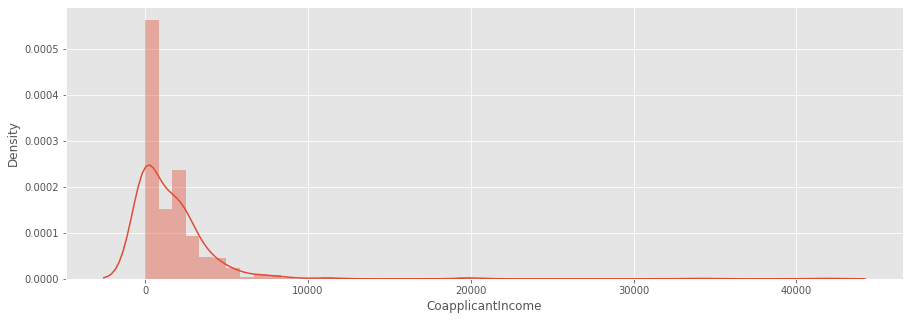

In [ ]:
#распределение доходов соискателей
plt.figure(figsize=(15,5))
sns.distplot(df['CoapplicantIncome'])

#### Аналогичная предыдущей ситуация

#распределение LoanAmount(сумма кредита)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



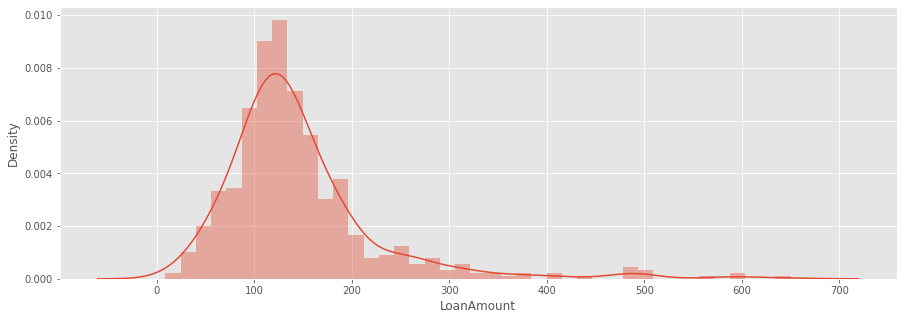

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['LoanAmount'])

#### Видим, что аномалий не наблюдается, можем также построить ящик с усами, но в целом уже понятно, что все в порядке

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



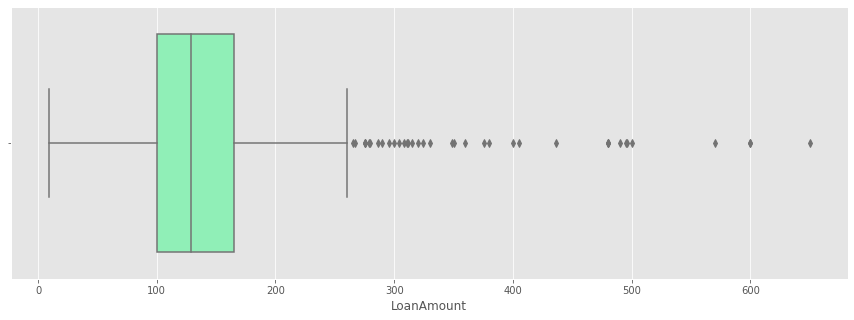

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df['LoanAmount'], palette='rainbow')

#### В нашем наборе данных много числовых признаков, но можно попробовать вывести таблицу корреляции

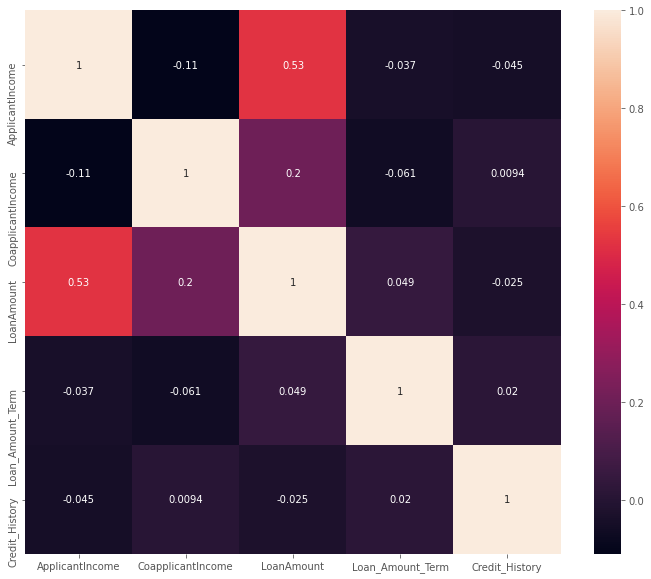

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

#### В целом корреляция между признаками слабая, значит, не нужно удалять столбцы, опасаясь, что какие-то столбцы сильно зависят друг от друга

## Визуализация данных
#### Графически изобразим соотношения женатых и не женатых соискателей

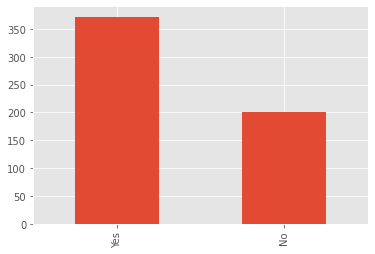

In [ ]:
df['Married'].value_counts().plot.bar()

#### Большинство соискателей женаты
#### Теперь посмотрим на Пол

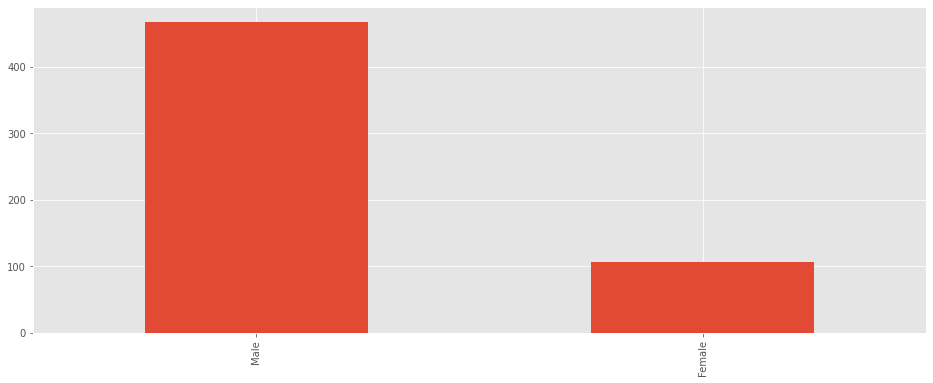

In [ ]:
plt.figure(figsize=(16,6))
df['Gender'].value_counts().plot.bar()

#### Большинство мужчины

#### Dependents(иждивенцы or not??) живущие в городе, селе

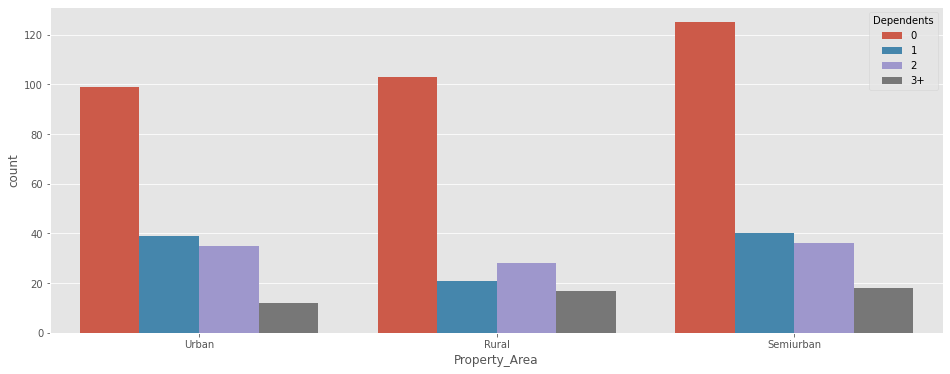

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['Property_Area'],hue=df['Dependents'])

#### Как было выяснено ранее, большинство соискателей - мужчины. Узнаем, сколько из них не являются самозанятыми

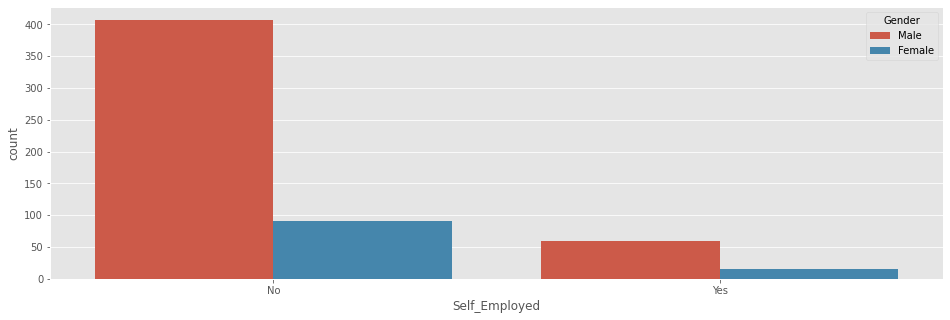

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['Self_Employed'],hue=df['Gender'])

#### Абсолютное большинство не является
#### Выведем категориальную диаграмму рассеяния с непересекающимися точками для выявления взаимосвязи между Доходом и Самозанятостью

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



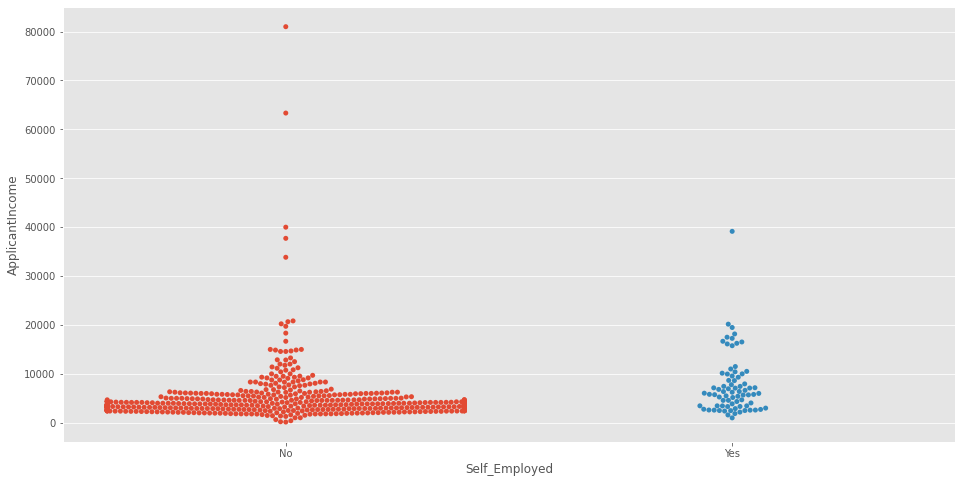

In [ ]:
plt.figure(figsize=(16,8))
sns.swarmplot(y=df['ApplicantIncome'],
              x=df['Self_Employed'])

#### Диаграмма показывает, что не самозанятые и самозанятые в целом имеют одинаковый доход, но есть выбросы у обоих групп

#### Выведем категориальную диаграмму рассеяния с непересекающимися точками для выявления взаимосвязи между суммой кредита и местом жительства(город село)


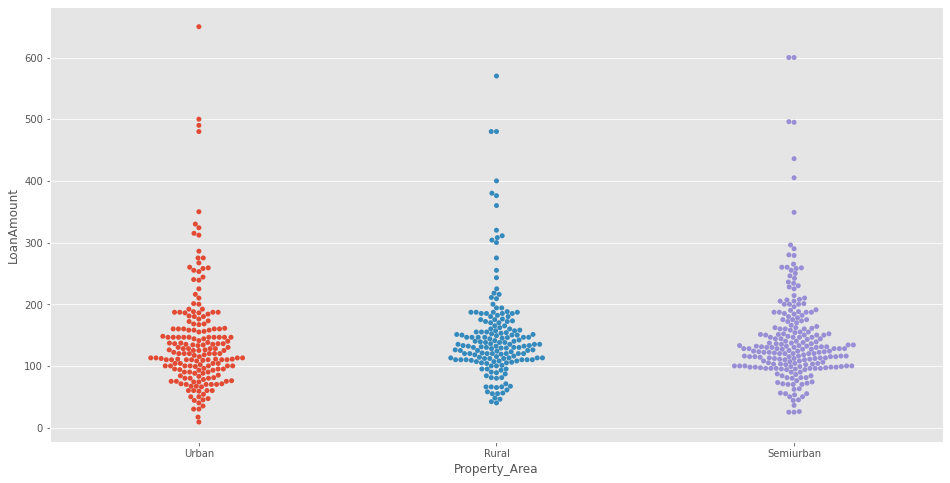

In [ ]:
plt.figure(figsize=(16,8))
sns.swarmplot(y=df['LoanAmount'],
              x=df['Property_Area'])

####  ничего необычного не выявлено, разницы где ты живешь нет
#### Узнаем, есть ли какая-то связь между ApplicantIncome и 	CoapplicantIncome, при помощи regplot

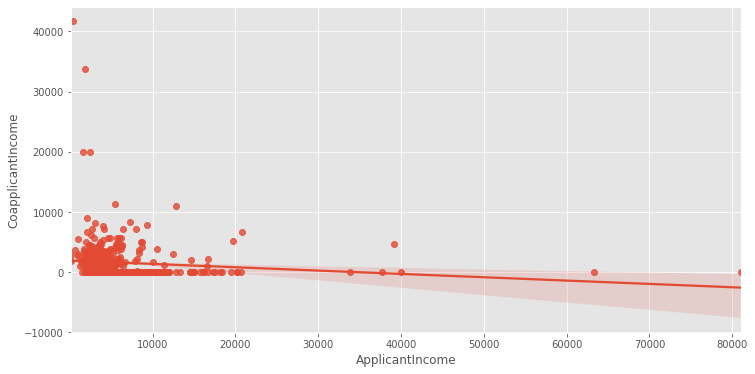

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['ApplicantIncome'],
            y=df['CoapplicantIncome'])

#### Да, существует небольшая положительная связь.

#### На данном графике можно увидеть зависимость дохода от пола и самозанятости. Наибольшая з/п у мужчины который не самозанят

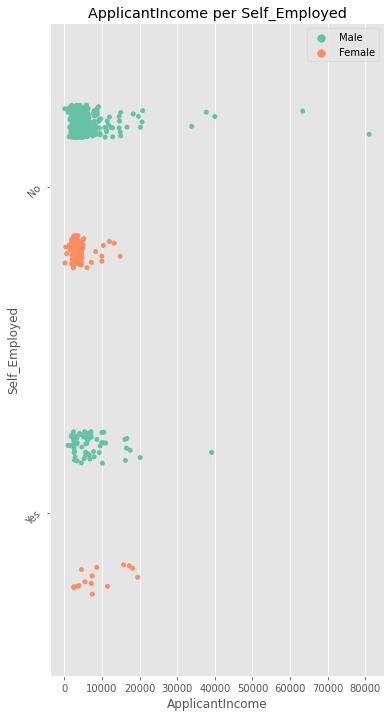

In [ ]:
plt.figure(figsize=(6,12))
sns.stripplot(data=df, x="ApplicantIncome",y="Self_Employed",hue="Gender",jitter=True,dodge=True,palette="Set2",)
plt.legend(loc=0)
plt.xlabel('ApplicantIncome')
plt.ylabel('Self_Employed')
plt.title('ApplicantIncome per Self_Employed')
plt.yticks(rotation=45)
plt.show()

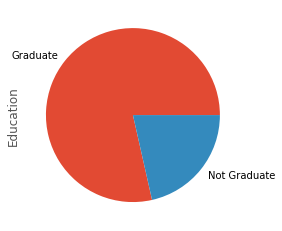

In [ ]:
# круговая диаграмма образования
df['Education'].value_counts().plot(kind='pie')

## Выводы:
### Была проведена описательная статистика и визуализация набора данных о соискателях.
### Выяснилось, что большинство соискателей женаты и это мужчины.
### Наибольший доход у несамозанятого мужчины
### Зависимости между суммой кредита и местом ж. нет
### Существует небольшая положительная связь между ApplicantIncome и 	CoapplicantIncome
### Остальные выводы есть выше, просто не успеваю написать уже

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.model_selection import cross_validate

In [ ]:
# трансформируем строки в числовые значения
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [ ]:
# Выделяем целевую переменную и факторные переменные и делим выборку на тестовую и тренировочную
X = df[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area']]
y = df['Loan_Status'] 

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=54)

#### Построение модели

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import  numpy as np
import pandas as pd
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(test_X, test_y)

0.782608695652174

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y, lr.predict(test_X)))

              precision    recall  f1-score   support

           0       0.93      0.37      0.53        38
           1       0.76      0.99      0.86        77

    accuracy                           0.78       115
   macro avg       0.85      0.68      0.69       115
weighted avg       0.82      0.78      0.75       115



С помощью логистической регрессии мы получаем хорошую модель с довольно высокой точностью. Однако стоит учитывать, что наша выборка была слишком мала, чтобы мы могли использовать такую модель в реальной жизни

Попробуем 2 модель - random forest, затем посмотрим полученные метрики и сравним с предыдущими моделями

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m3 = RandomForestClassifier()
m3.fit(train_X, train_y)
m3.score(test_X, test_y)
print(metrics.classification_report(test_y, m3.predict(test_X)))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56        38
           1       0.77      0.96      0.86        77

    accuracy                           0.78       115
   macro avg       0.81      0.69      0.71       115
weighted avg       0.79      0.78      0.76       115



In [ ]:
# Рассмотрим 3 метод: метод k-ближайших соседей

In [ ]:
import sklearn.neighbors as neigh
m4 = neigh.KNeighborsClassifier(n_neighbors=5)
m4.fit(train_X, train_y)
m4.score(test_X, test_y)
print(metrics.classification_report(test_y, m4.predict(test_X)))

              precision    recall  f1-score   support

           0       0.18      0.05      0.08        38
           1       0.65      0.88      0.75        77

    accuracy                           0.61       115
   macro avg       0.42      0.47      0.42       115
weighted avg       0.50      0.61      0.53       115



Получился плохой результат. Самый лучший результат у рандом форест и логистической регрессии

Не успеваю дописать но вот дополнительные вещи по визуализации

Гистограммы по каждому признаку

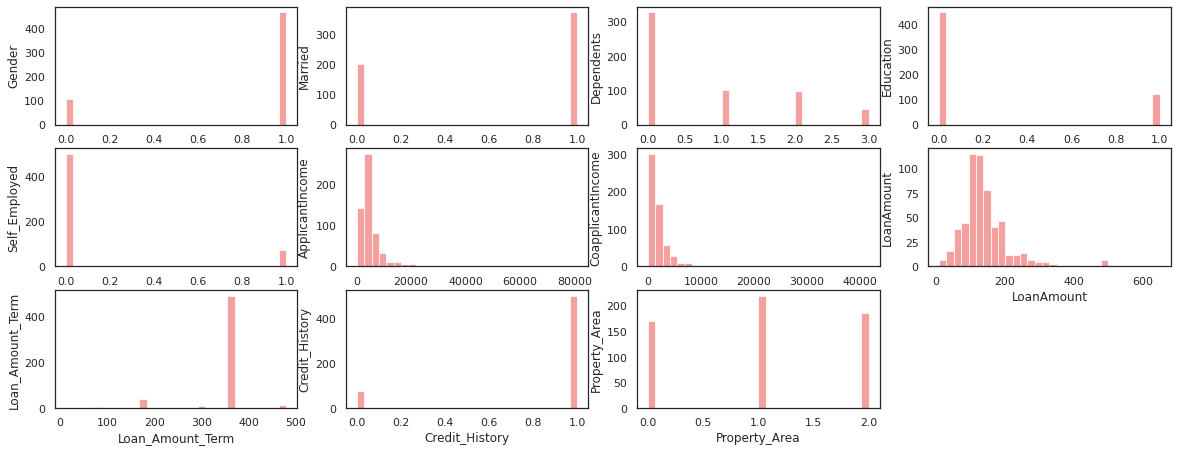

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("white")
plot_number = 0 
for feature_name in X.columns: 
     plot_number += 1    
     plt.subplot(4, 4, plot_number)
     sns.histplot(data=df, x = feature_name, bins = 30, color = 'lightcoral')
     plt.ylabel(feature_name)

Зависимости между признаками


In [ ]:
newdata = X.copy()
newdata['Target'] = y
newdata.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
Gender,1.000000,0.356171,0.174770,0.052040,-0.015000,0.054862,0.078322,0.104707,-0.088499,0.015000,-0.005952,0.025631
Married,0.356171,1.000000,0.351761,0.010213,-0.007493,0.038049,0.066407,0.142135,-0.106419,0.018336,0.016819,0.100145
Dependents,0.174770,0.351761,1.000000,0.062234,0.059211,0.081629,0.037161,0.128839,-0.100326,-0.048948,0.010447,0.007797
Education,0.052040,0.010213,0.062234,1.000000,-0.013856,-0.135101,-0.068898,-0.164363,-0.085499,-0.049156,-0.061874,-0.068610
Self_Employed,-0.015000,-0.007493,0.059211,-0.013856,1.000000,0.147854,-0.027082,0.123562,-0.027144,-0.033494,-0.040144,-0.023527
ApplicantIncome,0.054862,0.038049,0.081629,-0.135101,0.147854,1.000000,-0.109055,0.525307,-0.036708,-0.044819,-0.023656,-0.030596
CoapplicantIncome,0.078322,0.066407,0.037161,-0.068898,-0.027082,-0.109055,1.000000,0.204992,-0.060841,0.009386,0.028023,-0.065543
LoanAmount,0.104707,0.142135,0.128839,-0.164363,0.123562,0.525307,0.204992,1.000000,0.048744,-0.024677,-0.045584,-0.060798
Loan_Amount_Term,-0.088499,-0.106419,-0.100326,-0.085499,-0.027144,-0.036708,-0.060841,0.048744,1.000000,0.019517,-0.074326,-0.007145
Credit_History,0.015000,0.018336,-0.048948,-0.049156,-0.033494,-0.044819,0.009386,-0.024677,0.019517,1.000000,0.000621,0.506605


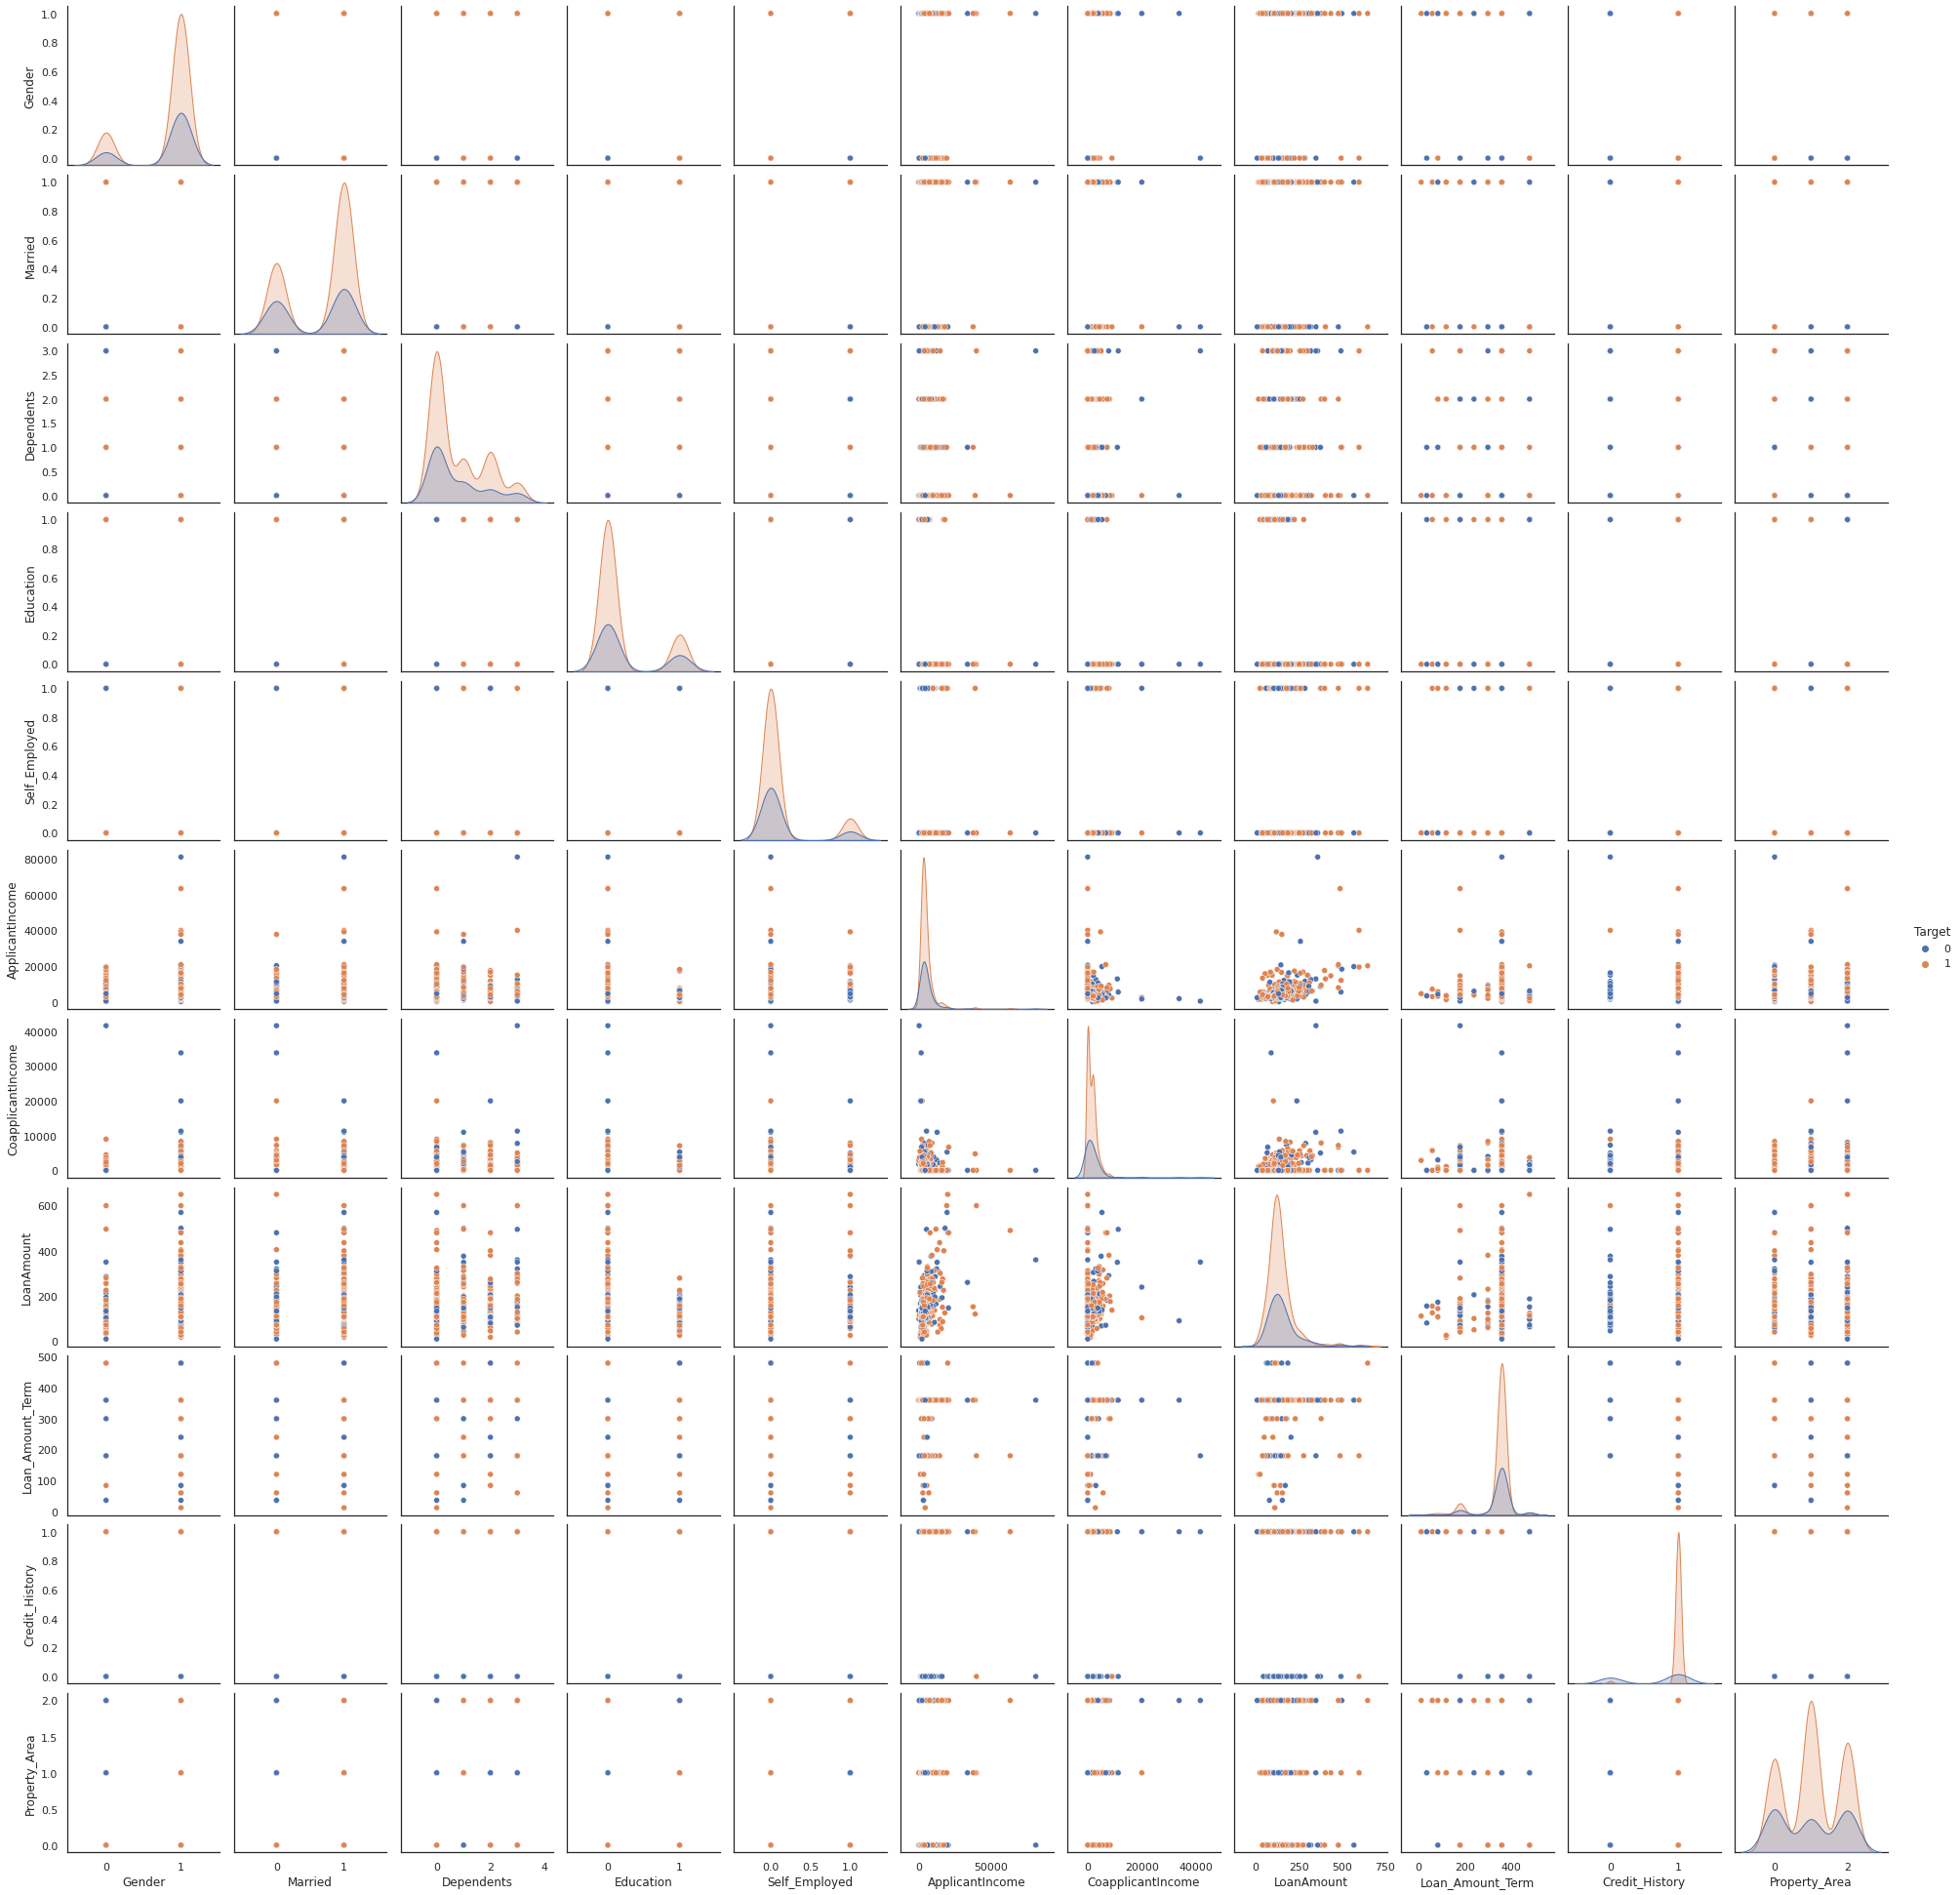

In [ ]:
 sns.pairplot(data = newdata, hue = 'Target') 